<a href="https://colab.research.google.com/github/solcanalla/fiumark/blob/main/randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo: Random Forest#

Ensamble de tipo bagging.

##Inicialización##

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
!git clone https://github.com/solcanalla/fiumark.git
%cd fiumark
!git pull origin main
import preprocessing as pp

fatal: destination path 'fiumark' already exists and is not an empty directory.
/content/fiumark
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 35 (delta 1), reused 0 (delta 0), pack-reused 29
Unpacking objects: 100% (35/35), done.
From https://github.com/solcanalla/fiumark
 * branch            main       -> FETCH_HEAD
   eed0d4d..82094dc  main       -> origin/main
Updating eed0d4d..82094dc
Fast-forward
 README.md          |   4 +-
 decisiontree.ipynb | 265 +++++++++++++++++++++++++++++++++--------------------
 knn.ipynb          | 228 ++++++++++++++++++++++++++++++---------------
 naive_bayes.ipynb  | 204 +++++++++++++++++++++++++++++------------
 preprocessing.py   |  79 +++++++++++++++-
 preprocessing2.py  |  68 --------------
 svm.ipynb          | 245 +++++++++++++++++++++++++++++++------------------
 7 files changed, 704 insertions(+), 389 deletions(-)
 delete mode 100644 preprocessing2

##Modelo 1##

###Pre procesamiento###

In [3]:
pd.options.display.max_columns = None

df = pp.get_dataset()
df1 = pp.common_preprocessing(df)
X_train1, X_test1, y_train1, y_test1 = pp.get_train_test_data(df1)

###Entrenamiento###

In [4]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': np.arange(40,100,10),
    'max_depth': np.arange(2, 20),
    'max_features': np.arange(2,13)
}

clf = RandomForestClassifier(random_state=42)

gscv1 = GridSearchCV(
    clf, params, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train1, y_train1)

In [5]:
print(f"Best score: {gscv1.best_score_}")
print(f"Best params {gscv1.best_params_}")

Best score: 0.8656283973241194
Best params {'max_depth': 3, 'max_features': 7, 'n_estimators': 50}


##Modelo 2##

###Pre procesamiento###

In [6]:
pd.options.display.max_columns = None

df = pp.get_dataset()
df2 = pp.min_features_preprocessing(df)
X_train2, X_test2, y_train2, y_test2 = pp.get_train_test_data(df2)

###Entrenamiento###

In [7]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': np.arange(40,100,10),
    'max_depth': np.arange(2, 20),
    'max_features': np.arange(2,13)
}

clf = RandomForestClassifier(random_state=42)

gscv2 = GridSearchCV(
    clf, params, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train2, y_train2)

In [8]:
print(f"Best score: {gscv2.best_score_}")
print(f"Best params {gscv2.best_params_}")

Best score: 0.8514496617476105
Best params {'max_depth': 5, 'max_features': 2, 'n_estimators': 90}


##Evaluación del modelo##

In [9]:
y_pred = gscv1.predict(X_test1)

###Precision recall y F1-score###

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86        95
           1       0.91      0.61      0.73        66

    accuracy                           0.81       161
   macro avg       0.84      0.78      0.79       161
weighted avg       0.83      0.81      0.80       161



###Accuracy###

In [11]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test1, y_pred)
accuracy

0.8136645962732919

###Auc-Roc###

In [12]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test1, y_pred)
auc_roc

0.7819776714513557

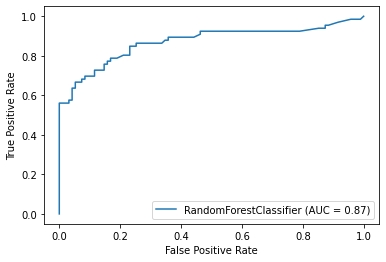

In [14]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gscv1.best_estimator_, X_test1, y_test1)  
plt.show() 

###Matriz de confusión###

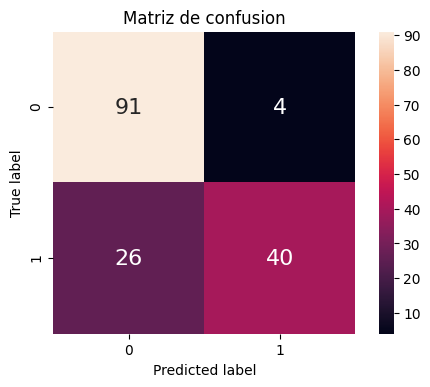

In [15]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    names = sorted(set(y_true))
    cm = confusion_matrix(y_true, y_pred, names)
    df_cm = pd.DataFrame(cm, names, names)

    plt.figure(dpi=100)
    plt.title("Matriz de confusion")
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', square=True)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()


plot_confusion_matrix(y_test1, y_pred)

##Predicción##

In [16]:
X_holdout = pd.read_csv('https://drive.google.com/uc?export=download&id=1I980-_K9iOucJO26SG5_M8RELOQ5VB6A')
X = pp.common_preprocessing(X_holdout)
prediction = pd.DataFrame(gscv1.predict(X),columns=['volveria'],dtype=int)
pred_formatted = pd.concat([X_holdout.id_usuario,prediction],axis=1)
pred_formatted.to_csv('randomforest.csv')
pred_formatted

,id_usuario,volveria
0,650,1
1,234,0
2,31,0
3,552,0
4,411,0
...,...,...
85,354,0
86,82,0
87,172,0
88,8,0
